# Intro to Data Science - Homework 4 - Fall 2024 - Wilmington College
## Due Date: April 05, 2024, 11:30 AM (Before the Start of Our Class)

Dear Students,

Welcome to Homework 4 for the Intro to Data Science course.

**Submission Instructions:**
Please complete the homework and commit your changes to GitHub. 

Last part of each problem dedicated to this question: "How long did it take you to solve this question? Was it easy, medium, or hard for you? Feel free to share any comments you have."

**Alternative Submission:**
If, for any reason, you are unable to use GitHub, you can submit your work via email.

Remember, timely completion of assignments is crucial for your understanding of the course material. If you face any challenges, don't hesitate to reach out.

###  Replace Employee ID With The Unique Identifier

You are given two tables: Employees and EmployeeUNI. The Employees table contains information about employees in a company, including their ID and name. The EmployeeUNI table contains the unique IDs corresponding to each employee. Your task is to show the unique ID of each employee, replacing null for those who do not have a unique ID.

# Input Data

## Employees table:
| id | name     |
|----|----------|
| 1  | Alice    |
| 7  | Bob      |
| 11 | Meir     |
| 90 | Winston  |
| 3  | Jonathan |

## EmployeeUNI table:
| id | unique_id |
|----|-----------|
| 3  | 1         |
| 11 | 2         |
| 90 | 3         |

# Approach

1. Read the input data into pandas DataFrames.
2. Merge the Employees and EmployeeUNI DataFrames on the 'id' column using a left join.
3. Fill missing values in the 'unique_id' column with 'null'.
4. Display the result table.


In [134]:
import pandas as pd
import numpy as np
employees_data = {
    "id":[1, 7, 11, 90, 3],
    "name": ["Alice", "Bob", "Meir", "Winston", "Jonathan"]}

employeesuni_data= {
    "id": [3, 11, 90],
    "unique_id": [1, 2, 3]}

#create dataframes
employees_df = pd.DataFrame(employees_data)
employeesuni_df = pd.DataFrame(employeesuni_data)
employees_df


,id,name
0,1,Alice
1,7,Bob
2,11,Meir
3,90,Winston
4,3,Jonathan


In [135]:
employeesuni_df

,id,unique_id
0,3,1
1,11,2
2,90,3


In [136]:
#2. Merge the Employees and EmployeeUNI DataFrames on the 'id' column using a left join.
result_df= pd.merge(employees_df, employeesuni_df, on= "id", how= "left")
result_df

,id,name,unique_id
0,1,Alice,NaN
1,7,Bob,NaN
2,11,Meir,2.0
3,90,Winston,3.0
4,3,Jonathan,1.0


In [137]:
#3. Fill missing values in the 'unique_id' column with 'null'.
result_df['unique_id']= result_df['unique_id'].fillna('null')
result_df

,id,name,unique_id
0,1,Alice,null
1,7,Bob,null
2,11,Meir,2.0
3,90,Winston,3.0
4,3,Jonathan,1.0


In [138]:
#4. Display the result table.
result_df[['unique_id', 'name']]

,unique_id,name
0,null,Alice
1,null,Bob
2,2.0,Meir
3,3.0,Winston
4,1.0,Jonathan


This question was an easy difficulty. It took about 10 minutes to complete. 

# 2. Product Sales Analysis I

Given the Sales and Product tables, you need to report the product_name, year, and price for each sale_id in the Sales table. Return the resulting table in any order.

Sales table:
| sale_id | product_id | year | quantity | price |
|---------|------------|------|----------|------- 
| 1       | 100        | 2008 | 10       | 5000  |
| 2       | 100        | 2009 | 12       | 5000  |
| 7       | 200        | 2011 | 15       | 9000  |

Product table:
| product_id | product_name |
------------|--------------
| 100        | Nokia        |
| 200        | Apple        |
| 300        | Samsung      |

Output: 

| product_name | year  | price |
|--------------|-------|-------|
| Nokia        | 2008  | 5000  |
| Nokia        | 2009  | 5000  |
| Apple        | 2011  | 9000  |


# Approach

1. Join the Sales and Product tables on the product_id column.
2. Select the product_name, year, and price columns from the joined table.
3. Return the resulting table.



In [139]:
sales_table = {
    'sale_id': [1, 2, 7],
    'product_id': [100, 100, 200],
    'year': [2008, 2009, 2011],
    'quantity': [10, 12, 15],
    'price': [5000, 5000, 9000]
}

product_table = {
    'product_id': [100, 200, 300],
    'product_name': ['Nokia', 'Apple', 'Samsung']
}
sales_tables_df = pd.DataFrame(sales_table)
product_tables_df = pd.DataFrame(product_table)

#1. Join the Sales and Product tables on the product_id column.
merged_df= pd.merge(sales_tables_df, product_tables_df, on= 'product_id')
merged_df

,sale_id,product_id,year,quantity,price,product_name
0,1,100,2008,10,5000,Nokia
1,2,100,2009,12,5000,Nokia
2,7,200,2011,15,9000,Apple


In [140]:
#2. Select the product_name, year, and price columns from the joined table.
#3. Return the resulting table.
selected= ['product_name', 'year', 'price']
merged_df[selected]

,product_name,year,price
0,Nokia,2008,5000
1,Nokia,2009,5000
2,Apple,2011,9000


This question was an easier difficulty. It took about 15 minutes.

# 3. Product Sales Analysis II

You are given two tables: `Sales` and `Product`.

Table: Sales

| Column Name | Type  |
|-------------|-------|
| sale_id     | int   |
| product_id  | int   |
| year        | int   |
| quantity    | int   |
| price       | int   |

- (sale_id, year) is the primary key (combination of columns with unique values) of this table.
- `product_id` is a foreign key (reference column) to the Product table.
- Each row of this table shows a sale on the product `product_id` in a certain year.
- Note that the price is per unit.

Table: Product

| Column Name  | Type    |
|--------------|---------|
| product_id   | int     |
| product_name | varchar |

- `product_id` is the primary key (column with unique values) of this table.
- Each row of this table indicates the product name of each product.

Write a solution to select the product id, year, quantity, and price for the first year of every product sold. Return the resulting table in any order.

**Example:**

**Input:**
Sales table:

| sale_id | product_id | year | quantity | price |
|---------|------------|------|----------|-------|
| 1       | 100        | 2008 | 10       | 5000  |
| 2       | 100        | 2009 | 12       | 5000  |
| 7       | 200        | 2011 | 15       | 9000  |

Product table:

| product_id | product_name |
|------------|--------------|
| 100        | Nokia        |
| 200        | Apple        |
| 300        | Samsung      |

**Output:**

| product_id | first_year | quantity | price |
|------------|------------|----------|-------|
| 100        | 2008       | 10       | 5000  |
| 200        | 2011       | 15       | 9000  |


In [141]:
first_year= merged_df.groupby('product_id').agg(
    first_year= ('year', 'min'),
    quantity= ('quantity', 'first'),
    price= ('price', 'first')
)
first_year

,first_year,quantity,price
product_id,,,
100,2008,10,5000
200,2011,15,9000


This question was slightly more difficult than the problem before but it only took about 10 minutes.

# 4. Managers with at Least 5 Direct Reports

You are given a table, `Employee`, with the following structure and data:


| Column Name | Type    |
|-------------|---------
| id          | int     |
| name        | varchar |
| department  | varchar |
| managerId   | int     |


- `id` is the primary key for this table.
- Each row of this table represents an employee in the company. The `managerId` column contains the `id` of the employee's manager.
- If `managerId` is null, then the employee does not have a manager.
- No employee will be the manager of themself.

Write a Python code to find the names of managers who have at least five direct reports. Return the result table in any order.

**Example:**

**Input:**

Employee table:

| id  | name  | department | managerId |
-----|-------|------------|-----------
| 101 | John  | A          | null      |
| 102 | Dan   | A          | 101       |
| 103 | James | A          | 101       |
| 104 | Amy   | A          | 101       |
| 105 | Anne  | A          | 101       |
| 106 | Ron   | B          | 101       |


**Output:**


| name |
------
| John |


**Explanation:**

John is the only manager with at least five direct reports (Dan, James, Amy, Anne, and Ron).


In [142]:
employee_data = pd.DataFrame({
    'id': [101, 102, 103, 104, 105, 106],
    'name': ['John', 'Dan', 'James', 'Amy', 'Anne', 'Ron'],
    'department': ['A', 'A', 'A', 'A', 'A', 'B'],
    'managerId': [None, 101, 101, 101, 101, 101]
})
employee_data

,id,name,department,managerId
0,101,John,A,NaN
1,102,Dan,A,101.0
2,103,James,A,101.0
3,104,Amy,A,101.0
4,105,Anne,A,101.0
5,106,Ron,B,101.0


In [143]:
direct_reports_count = employee_data.groupby('managerId').size().reset_index(name='count')
managers_with_reports = direct_reports_count[direct_reports_count['count'] >= 5]
final_df= pd.merge(managers_with_reports, employee_data, left_on='managerId', right_on='id')['name']
pd.DataFrame(final_df, columns=['name'])

,name
0,John


This problem was a medium difficulty. It took about 20 minutes to complete.

# 5. From the dataset provided in HW3:

    a. Generate a histogram overlaid with a density plot for the ratings of the companies .
    b. Ensure to title your plot, label axes appropriately, and include a legend for clarity.
    c. Provide an interpretation of your plot.

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("companies.csv")

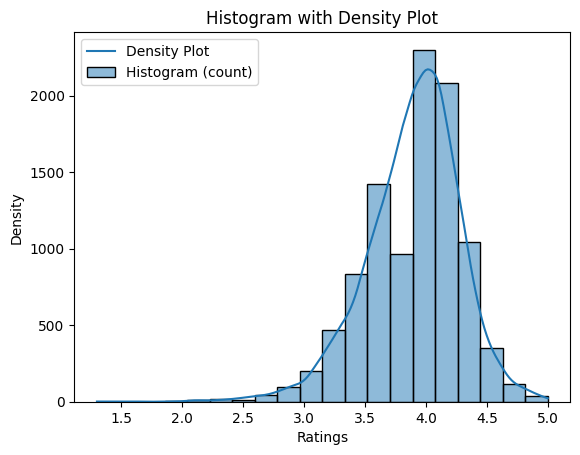

In [145]:
fig, ax = plt.subplots()
sns.histplot(df['Ratings'], bins= 20, kde= True)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')
ax.legend(labels=['Density Plot', 'Histogram (count)'])

plt.show()

Interpretation:
The histogram shows how the ratings of companies are distributed in the dataset, providing the frequency of different rating values. Then density plot is a smoothed estimation of the probability density function for the ratings, giving the likelihood of observing specific rating values.

Analyzing the graph, we can see the distribution of ratings across the companies. It is clear that the distribution is slightly skewed to the left, showing that a majority of companies tend to receive higher ratings compared to lower ratings. This skewness suggests that most companies in the dataset generally receive positive ratings from users, but there still is a varrying distribution of the ratings.



This question was an easier difficulty for me. It took about 10 minutes after reviewing matplotlib and seaborn. 

# 6. Using the provided dataset again, analyze the average salary across different industry sectors. Implement the following steps:

1. Group the data by industry sector (can be extracted from the Description) and calculate the mean salary for each sector.
2. Identify the top 10 and bottom 10 industry sectors based on average salary.
3. Concatenate the top and bottom sectors into a single DataFrame.
4. Visualize the top and bottom 10 average salaries by industry sector using a bar plot.

In [146]:
def convert_to_number(value):
    try:
        if 'k' in value:
            return float(value.replace('k', '')) * 1000
        else:
            return float(value)
    except ValueError:
        return np.nan  # Return NaN for non-convertible values

df['Avg_salary'] = df['Avg_salary'].apply(convert_to_number)

In [147]:
def filter_missing_salary_data(df):
    return df.dropna(subset=['Avg_salary'])
    

filter_missing_salary_data(df).head()

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits
0,TCS,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits",73.1k,856900.0,6.1k,847,11.5k
1,Accenture,IT Services & Consulting | 1 Lakh+ Employees |...,4.0,"Company Culture, Skill Development / Learning,...",NaN,46.4k,584600.0,4.3k,9.9k,7.1k
2,Cognizant,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,Skill Development / Learning,Promotions / Appraisal,41.7k,561500.0,3.6k,460,5.8k
3,Wipro,IT Services & Consulting | 1 Lakh+ Employees |...,3.8,Job Security,"Promotions / Appraisal, Salary & Benefits",39.2k,427400.0,3.7k,405,5k
4,Capgemini,IT Services & Consulting | 1 Lakh+ Employees |...,3.9,"Job Security, Work Life Balance, Skill Develop...","Promotions / Appraisal, Salary & Benefits",34k,414400.0,2.8k,719,4k


In [148]:
#1. Group the data by industry sector (can be extracted from the Description) and calculate the mean salary for each sector.
df['Industry_sector'] = df['Description'].str.split('|').str[0].str.strip()

sector_mean_salary = df.groupby('Industry_sector')['Avg_salary'].mean()
df['Industry_sector']

0         IT Services & Consulting
1         IT Services & Consulting
2         IT Services & Consulting
3         IT Services & Consulting
4         IT Services & Consulting
                   ...            
9995      IT Services & Consulting
9996                        Pharma
9997             Building Material
9998    Law Enforcement & Security
9999         Management Consulting
Name: Industry_sector, Length: 10000, dtype: object

In [149]:
#2. Identify the top 10 and bottom 10 industry sectors based on average salary.
sorted_sector_mean_salary = sector_mean_salary.sort_values(ascending=False)

top_10_sectors = sorted_sector_mean_salary.head(10)
top_10_sectors

Industry_sector
Banking                           11130.956989
Management Consulting              9039.666667
Fortune India 500                  6200.000000
IT Services & Consulting           5938.463433
10k-50k Employees                  4440.153846
Noida +69 more                     4400.000000
Insurance                          4101.210526
BPO                                3913.526316
Bangalore / Bengaluru +29 more     3500.000000
Mysuru / Mysore +9 more            3400.000000
Name: Avg_salary, dtype: float64

In [156]:
bottom_10_sectors = sorted_sector_mean_salary.tail(10)
bottom_10_sectors

Industry_sector
Kolkata +5 more                       41.0
Hanumangarh +8 more                   37.0
New Delhi +8 more                      9.0
2024 years old                         7.0
Bangalore Rural +2 more                4.0
Hyderabad / Secunderabad +1 more       3.0
Bangalore / Bengaluru +4 more          2.0
Dubai +7 more                          2.0
Hyderabad / Secunderabad +119 more     NaN
Mumbai +2 more                         NaN
Name: Avg_salary, dtype: float64

In [151]:
#3. Concatenate the top and bottom sectors into a single DataFrame.
combined_sectors = pd.concat([top_10_sectors, bottom_10_sectors])
combined_sectors

Industry_sector
Banking                               11130.956989
Management Consulting                  9039.666667
Fortune India 500                      6200.000000
IT Services & Consulting               5938.463433
10k-50k Employees                      4440.153846
Noida +69 more                         4400.000000
Insurance                              4101.210526
BPO                                    3913.526316
Bangalore / Bengaluru +29 more         3500.000000
Mysuru / Mysore +9 more                3400.000000
Kolkata +5 more                          41.000000
Hanumangarh +8 more                      37.000000
New Delhi +8 more                         9.000000
2024 years old                            7.000000
Bangalore Rural +2 more                   4.000000
Hyderabad / Secunderabad +1 more          3.000000
Bangalore / Bengaluru +4 more             2.000000
Dubai +7 more                             2.000000
Hyderabad / Secunderabad +119 more             NaN
Mumbai +2 more 

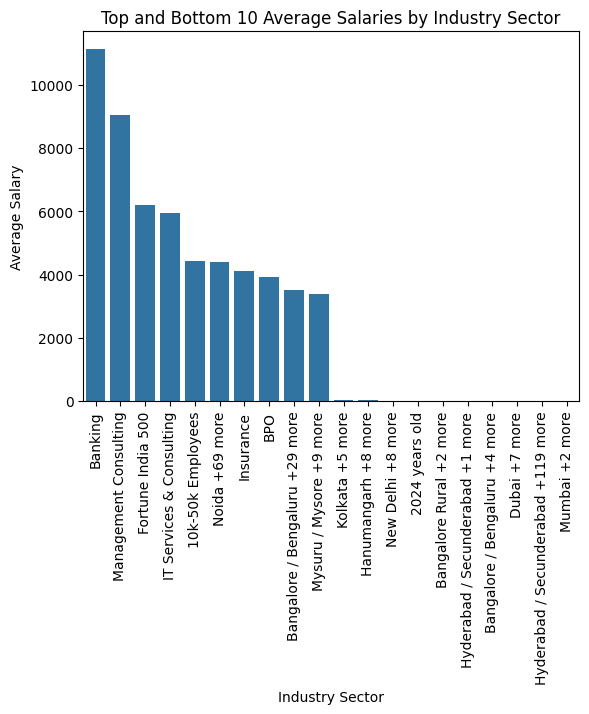

In [158]:
#4. Visualize the top and bottom 10 average salaries by industry sector using a bar plot.
sns.barplot(x=combined_sectors.index, y=combined_sectors.values)

# Set labels and title
plt.xlabel('Industry Sector')
plt.ylabel('Average Salary')
plt.title('Top and Bottom 10 Average Salaries by Industry Sector')

plt.xticks(rotation=90)

# Display the plot
plt.show()

This question was a harder difficulty firguring out how to find the industry sectors. It took me about 25 minutes. 

# 7. From the dataset provided in HW3:
Create a bar plot to display the top 10 companies based on their ratings.

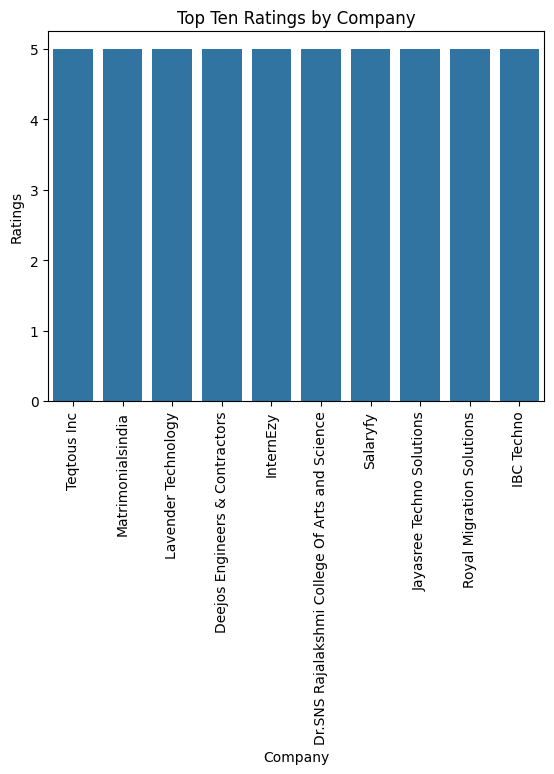

In [160]:
sorting = df.sort_values("Ratings", ascending=False)
top_ten= sorting.head(10)
sns.barplot(x=top_ten["Company_name"], y=top_ten["Ratings"])

plt.xlabel("Company")
plt.ylabel("Ratings")
plt.title("Top Ten Ratings by Company")

plt.xticks(rotation=90)

plt.show()

This question took me about 10 minutes to complete it was a medium difficulty.

# 8. From the dataset provided in HW3:
a. Following the analysis in question 2 part i, where outliers in the "Avg_salary" column were identified, now visualize them using a boxplot.
b. Create a boxplot for the "Avg_salary" column categorized by 5 samples of sectors.

In [154]:
# Detect and remove outliers
Q1 = df['Avg_salary'].quantile(0.25)
Q3 = df['Avg_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = df[(df['Avg_salary'] >= lower_bound) & (df['Avg_salary'] <= upper_bound)]
cleaned_df

,Company_name,Description,Ratings,Highly_rated_for,Critically_rated_for,Total_reviews,Avg_salary,Interviews_taken,Total_jobs_available,Total_benefits,Industry_sector
159,Kogta Financial India Limited,NBFC | 1k-5k Employees | Public | 28 years old...,4.8,"Company Culture, Work Life Balance, Work Satis...",NaN,3k,1300.0,67,13,51,NBFC
213,Marpu Foundation,Non-Profit | 51-200 Employees | 8 years old | ...,4.9,"Company Culture, Work Life Balance, Work Satis...",NaN,2.5k,13.0,24,--,84,Non-Profit
227,Paras Hospital,Healthcare | 1k-5k Employees | 18 years old | ...,4.6,"Skill Development / Learning, Company Culture,...",NaN,2.4k,2600.0,56,46,154,Healthcare
228,Wipro Consumer Care & Lighting,FMCG | 1k-5k Employees | 79 years old | Bangal...,3.9,Job Security,Promotions / Appraisal,2.4k,2900.0,41,30,286,FMCG
393,Kalyan Jewellers,Jewellery | 5k-10k Employees | Fortune India 5...,4.7,"Skill Development / Learning, Company Culture,...",NaN,1.6k,1300.0,37,14,59,Jewellery
...,...,...,...,...,...,...,...,...,...,...,...
9995,Techila Global Services,IT Services & Consulting | 501-1k Employees | ...,3.7,"Work Life Balance, Salary & Benefits, Company ...",NaN,72,454.0,2,26,21,IT Services & Consulting
9996,RxLogix Corporation,Pharma | 201-500 Employees | 14 years old | Pr...,2.6,"Work Life Balance, Work Satisfaction, Company ...",NaN,72,799.0,15,9,13,Pharma
9997,Avians Innovations Technology,Building Material | 51-200 Employees | 17 year...,3.7,"Promotions / Appraisal, Work Satisfaction, Sal...",NaN,72,489.0,3,11,8,Building Material
9998,ACPL Systems,Law Enforcement & Security | 51-200 Employees ...,3.3,"Promotions / Appraisal, Salary & Benefits, Wor...",NaN,72,520.0,4,1,10,Law Enforcement & Security


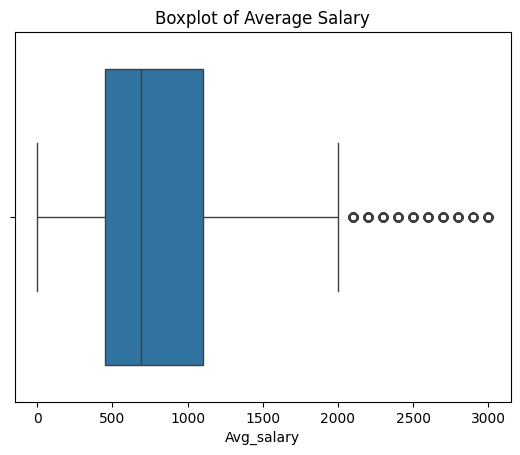

In [155]:
sns.boxplot(x=cleaned_df['Avg_salary'])

plt.title('Boxplot of Average Salary')

plt.show()

This was a medium difficulty, and took me 15 minutes to complete.